In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./diamonds/data.csv")

In [3]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698
...,...,...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,6.63,6.56,4.14,5315
40451,0.73,Ideal,F,VS2,62.6,56.0,5.77,5.74,3.60,2762
40452,1.26,Very Good,I,VS1,59.2,60.0,7.09,7.02,4.18,6855
40453,0.72,Ideal,G,SI2,61.4,56.0,5.76,5.83,3.56,2297


In [4]:
df["cut"].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [5]:
df["color"].unique()

array(['G', 'H', 'F', 'D', 'E', 'I', 'J'], dtype=object)

In [6]:
#X = df[["carat", "cut", "clarity", "depth", "table", "x", "y", "z"]]
#y = df["price"]

In [7]:
#X

In [8]:
def heat(df, figsize=(9,9)):
    ax = sns.heatmap(df, linewidths=.5)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
    sns.set(rc={'figure.figsize':figsize})
    ax

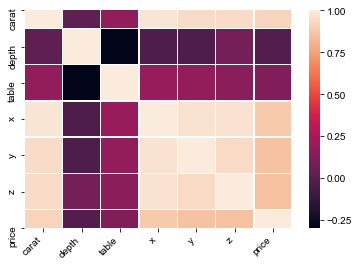

In [9]:
heat(df.corr(), (6,6))

In [10]:
df.drop("carat", axis=1, inplace=True)

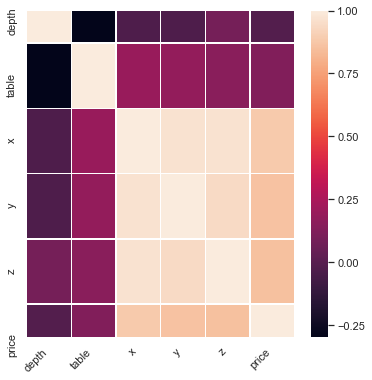

In [11]:
heat(df.corr(), (6,6))

In [12]:
df.drop("x", axis=1, inplace=True)

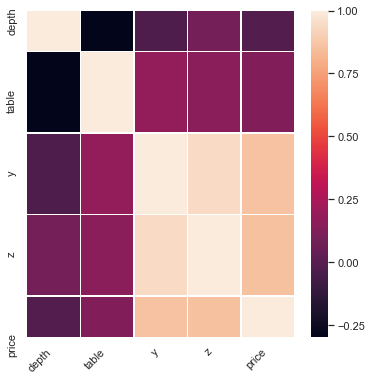

In [13]:
heat(df.corr(), (6,6))

In [14]:
df.drop(["y", "z"], axis=1, inplace=True)

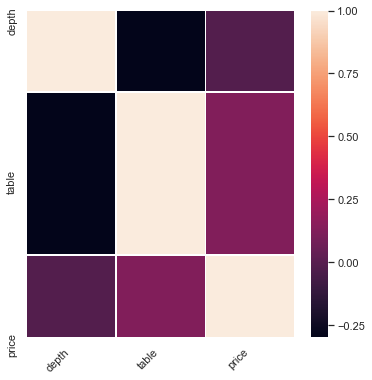

In [15]:
heat(df.corr(), (6,6))

In [16]:
df

,cut,color,clarity,depth,table,price
0,Ideal,G,SI2,61.9,57.0,12831
1,Very Good,H,SI2,63.2,57.0,16170
2,Premium,F,SI2,61.0,57.0,2797
3,Ideal,F,I1,63.3,60.0,630
4,Ideal,G,VS2,61.6,55.0,698
...,...,...,...,...,...,...
40450,Premium,H,SI1,62.8,61.0,5315
40451,Ideal,F,VS2,62.6,56.0,2762
40452,Very Good,I,VS1,59.2,60.0,6855
40453,Ideal,G,SI2,61.4,56.0,2297


In [17]:
df_cut_dummies = pd.get_dummies(df["cut"])

In [18]:
#df.drop("cut", axis=1, inplace=True)

In [19]:
df.drop("cut", axis=1, inplace=True)

In [22]:
df2 = pd.concat([df, df_cut_dummies], axis=1, sort=True)

In [23]:
df2

,color,clarity,depth,table,price,Fair,Good,Ideal,Premium,Very Good
0,G,SI2,61.9,57.0,12831,0,0,1,0,0
1,H,SI2,63.2,57.0,16170,0,0,0,0,1
2,F,SI2,61.0,57.0,2797,0,0,0,1,0
3,F,I1,63.3,60.0,630,0,0,1,0,0
4,G,VS2,61.6,55.0,698,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
40450,H,SI1,62.8,61.0,5315,0,0,0,1,0
40451,F,VS2,62.6,56.0,2762,0,0,1,0,0
40452,I,VS1,59.2,60.0,6855,0,0,0,0,1
40453,G,SI2,61.4,56.0,2297,0,0,1,0,0


In [24]:
df_color_dummies = pd.get_dummies(df["color"])

In [25]:
df_color_dummies

,D,E,F,G,H,I,J
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
40450,0,0,0,0,1,0,0
40451,0,0,1,0,0,0,0
40452,0,0,0,0,0,1,0
40453,0,0,0,1,0,0,0


In [27]:
df3 = pd.concat([df2, df_color_dummies], axis=1, sort=True)

In [28]:
df3

,color,clarity,depth,table,price,Fair,Good,Ideal,Premium,Very Good,D,E,F,G,H,I,J
0,G,SI2,61.9,57.0,12831,0,0,1,0,0,0,0,0,1,0,0,0
1,H,SI2,63.2,57.0,16170,0,0,0,0,1,0,0,0,0,1,0,0
2,F,SI2,61.0,57.0,2797,0,0,0,1,0,0,0,1,0,0,0,0
3,F,I1,63.3,60.0,630,0,0,1,0,0,0,0,1,0,0,0,0
4,G,VS2,61.6,55.0,698,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,H,SI1,62.8,61.0,5315,0,0,0,1,0,0,0,0,0,1,0,0
40451,F,VS2,62.6,56.0,2762,0,0,1,0,0,0,0,1,0,0,0,0
40452,I,VS1,59.2,60.0,6855,0,0,0,0,1,0,0,0,0,0,1,0
40453,G,SI2,61.4,56.0,2297,0,0,1,0,0,0,0,0,1,0,0,0


In [29]:
df3.drop("color", axis=1, inplace=True)

In [30]:
df3

,clarity,depth,table,price,Fair,Good,Ideal,Premium,Very Good,D,E,F,G,H,I,J
0,SI2,61.9,57.0,12831,0,0,1,0,0,0,0,0,1,0,0,0
1,SI2,63.2,57.0,16170,0,0,0,0,1,0,0,0,0,1,0,0
2,SI2,61.0,57.0,2797,0,0,0,1,0,0,0,1,0,0,0,0
3,I1,63.3,60.0,630,0,0,1,0,0,0,0,1,0,0,0,0
4,VS2,61.6,55.0,698,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,SI1,62.8,61.0,5315,0,0,0,1,0,0,0,0,0,1,0,0
40451,VS2,62.6,56.0,2762,0,0,1,0,0,0,0,1,0,0,0,0
40452,VS1,59.2,60.0,6855,0,0,0,0,1,0,0,0,0,0,1,0
40453,SI2,61.4,56.0,2297,0,0,1,0,0,0,0,0,1,0,0,0


In [31]:
df["clarity"].unique()

array(['SI2', 'I1', 'VS2', 'SI1', 'VS1', 'VVS2', 'IF', 'VVS1'],
      dtype=object)

In [32]:
df_clarity_dummies = pd.get_dummies(df["clarity"])

In [33]:
df_clarity_dummies

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
40450,0,0,1,0,0,0,0,0
40451,0,0,0,0,0,1,0,0
40452,0,0,0,0,1,0,0,0
40453,0,0,0,1,0,0,0,0
